In [189]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from numpy import random as rd
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 8]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower
sns.set_theme(context="notebook")

def limiar_MEDIA(espontaneo,alpha):
    # media do sinal espontâneo (ruído)
    return np.quantile(np.mean(espontaneo,axis=0), 1-alpha)

In [190]:
# %plotar valores críticos
# alfa = 0.05;
# L = 10; 

# f = 10; 
# fs = 100; 
# N = 1000; 
# amplitude_ruido = 10; 
# A =1;

# %
# [~,VC_teorico] = VC_LFT(L,alfa,2);
# s(:,1) = sin(2*pi*f/fs*[0:(N-1)]);
# x = A *s + amplitude_ruido*randn(N,1); 

# Parametros de simulação
amostras = 10 # num de "indivíduos"
nSim = 10000 # aumentar (law of large numbers) 5*10**4

# frequencia do sinal
f0 = 50 

#frequencia de amostragem
fs = 100 

# Confiança desejada: (5% = padrão, 1% = "rigoroso")
alpha = 5/100 

# gerando ruido
N = round(fs*nSim/(f0*2*(np.pi)))
# print(fs*nSim/f0)
# print(np.linspace(0,N,nSim).shape)
# print(np.ceil(fs/(f0*2*(np.pi))))
# print(nSim)
# print(f0/fs)
arg = np.multiply(np.multiply(np.linspace(0,N,nSim),np.ones((amostras,nSim))),2*(np.pi)*f0/fs) # argumento do 
print(arg.shape)

energiaRuido = 1 # coincide com amplitude máx do ruido, pois média do ruido tende 0
ruido = energiaRuido*rd.randn(amostras,nSim) 



# gerando sinal, senoide em tempo discreto:
# sinal = np.zeros((amostras,nSim))
amplitude = 10 # escolha arbitrária (escolher amplitude com base na SNR)
theta0 = 0 # angulo inicial do sinal (e.g.: np.pi/6)
# sinal = amplitude*np.sin(arg+theta0) + ruido

# sinal = np.sin(arg+theta0)
sinal = np.ones((amostras,nSim))

print(arg.shape)
print(sinal[1])

# Calcular valor crítico a partir do ruído: (depende da técnica utilizada, aqui feito manualmente)
limiar = limiar_MEDIA(ruido, alpha)
print('Limiar:', limiar)

# listaSNRs = np.linspace(-10,1,1000)
listaSNRs = np.linspace(-50,50,1000)
probDetec = np.zeros((len(listaSNRs),1))
# senonide tempo discreto
# amplitude = 10**(listaSNRs[round(len(listaSNRs)/2)]/20)*(energiaRuido**2)
# arg = 2*(np.pi)*f0*(np.linspace(0,N))
# cosa = ruido[0,0]+ amplitude*np.cos(theta0+arg);

(10, 10000)
(10, 10000)
[1. 1. 1. ... 1. 1. 1.]
Limiar: 0.5209730526631074


In [191]:
print('Simulando')
xHist = np.zeros((len(listaSNRs),amostras,nSim))

for i, SNRi in enumerate(listaSNRs):
    amplitude = 10**(SNRi/20)*(energiaRuido**2)
    # print(ruido.shape)
    # print(sinal.shape)
    # print(np.multiply(amplitude,sinal).shape)
    
    x = ruido +(np.multiply(amplitude,sinal))
    xHist[i,:,:]= x
    
    # print(x.shape)
    sinalMedio = np.mean(x,axis = 0)

    probDetec[i] = np.mean(sinalMedio>limiar)

print('Done')
print(probDetec.shape)
print(xHist.shape)

Simulando
Done
(1000, 1)
(1000, 10, 10000)


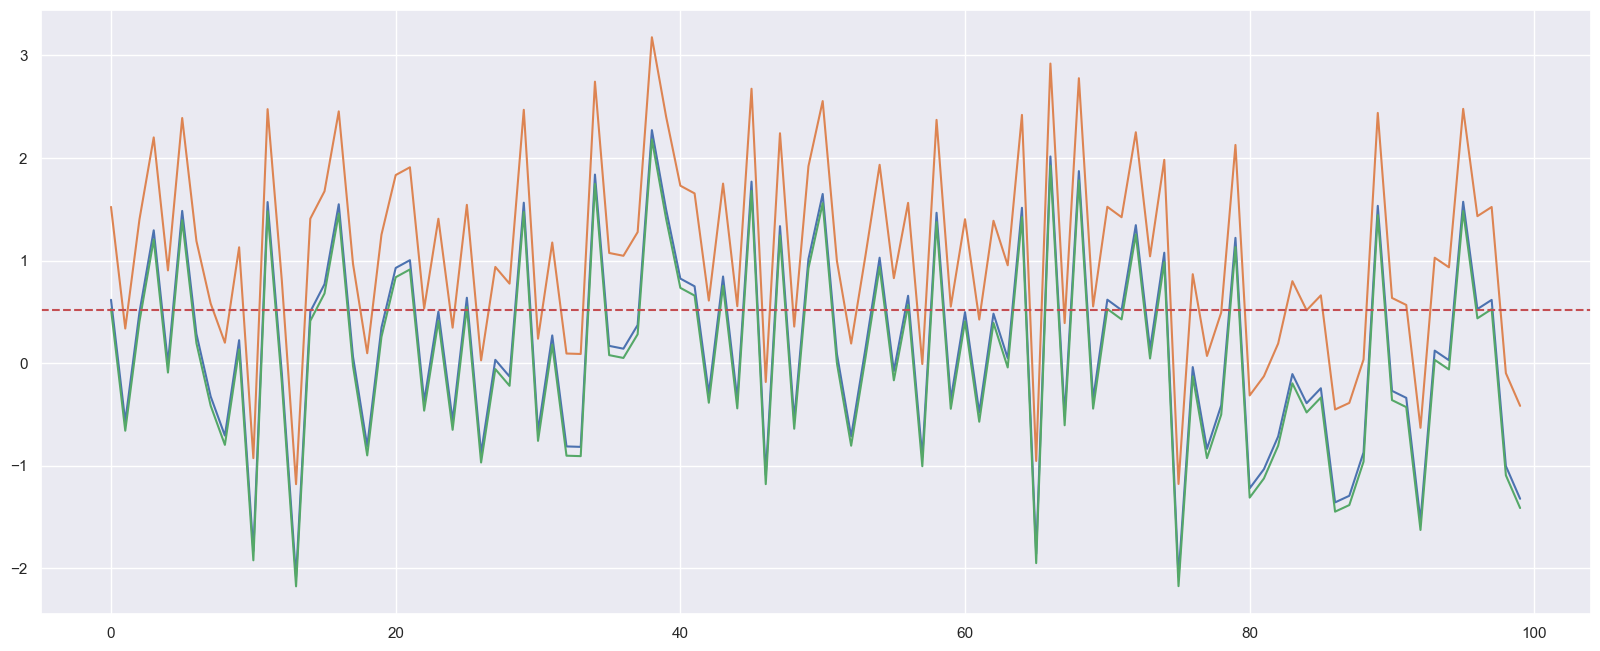

In [192]:
# sns.lineplot(x = np.linspace(0,N),y= cosa);
# sns.scatterplot(x = np.linspace(0,N),y= cosa)
sns.lineplot(data = xHist[300][5][0:100]);
sns.lineplot(data = xHist[500][5][0:100]);
sns.lineplot(data = xHist[100][5][0:100]);
# sns.lineplot(data = ruido[1][],color='tab:orange');
# sns.lineplot(data = limiar)
plt.axhline(limiar, 0,1,c='r',linestyle='--')

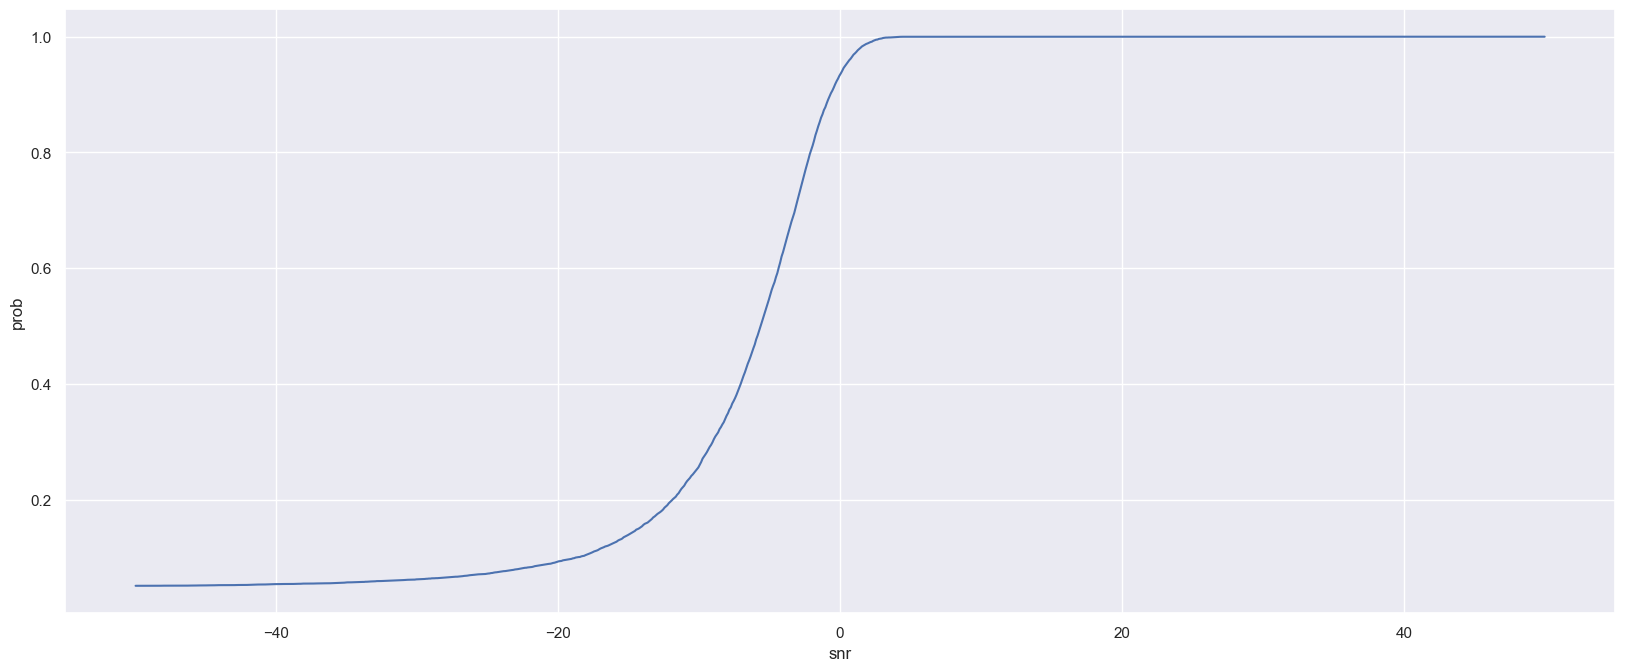

In [193]:
pD = pd.DataFrame({'snr': listaSNRs,'prob':probDetec[:,0]})
sns.lineplot(data = pD,x='snr',y='prob');

In [194]:
# fig,ax = plt.subplots()
# sns.histplot(x= np.mean(ruido,axis=0), kde= True,ax=fig.axes[0],color='tab:orange')  
# # sns.histplot(x= np.mean(x,axis=0), kde= True,ax=fig.axes[0])
# sns.histplot(x= xHist[999][0], kde= True,ax=fig.axes[0])
# plt.axvline(limiar, 0,1,c='r',linestyle='--')
# fig.axes[0].set_title('Visualizando limiar')
# plt.legend(['Sinal','Ruído','Limiar'])

# plt.show()